# Transport properties plot

CRYSTALClear contains functions to read the computed Seebeck Coefficient ($S$) and Electrical Conductivity ($\sigma$) from a PROPERTIES calculation and to compute and plot the thermoelectrical Power Factor $(PF=S^2*\sigma)$ and the Figure of Merit ($ZT=(PF*T)/K_{tot}$, where $K_{tot}$ is the total thermal conductivity). 
Please, note that the first essential step consists in running a properties calculation with CRYSTAL by using the keyword  BOLTZTRA (see the [User's Manual](https://www.crystal.unito.it/include/manuals/crystal23.pdf) for details). 
Below, we will show how to exploit such functionalities referring to calculations on the ZrNiSn Half Heusler alloy.

In [4]:
from CRYSTALClear.crystal_io import *
import CRYSTALClear.plot as CCplt 

At first we will create two seebeck objects, seebeck and seebeck1, reading two SEEBECK.DAT files.

In [2]:
seebeck = Properties_output().read_cry_seebeck('transport_zrnisn_SEEBECK.DAT')

In [16]:
seebeck1 = Properties_output().read_cry_seebeck('transport_zrnisn_antisito_SEEBECK.DAT')

We can plot them as a function of the chemical potential or of the charge carrier concentration, using the plot_cry_seebeck_potential and the plot_cry_seebeck_carrier funcitons. 
To acquire information on the structure of the function we can write ?function name and run the cell.
The plotting functions generate matplotlib figure objects.

In [9]:
?CCplt.plot_cry_seebeck_potential

Signature: CCplt.plot_cry_seebeck_potential(seebeck_obj, direction, temperature)
Docstring:
Plot the Seebeck coefficient as a function of chemical potential.

Args:
    seebeck_obj (object): Seebeck object containing the data for the Seebeck coefficient.
    direction (str): choose the direction to plot among 'S_xx', 'S_xy', 'S_xz', 'S_yx', 'S_yy', 'S_yz', 'S_yz', 'S_zx', 'S_zy', 'S_zz'.
    temperature (value/str): choose the temperature to be considered or 'all' to consider them all together

Returns:
    Figure object

Notes:
    - Plots the Seebeck coefficient as a function of chemical potential for each temperature.
    - Distinguishes between n-type and p-type conduction with dashed and solid lines, respectively.
File:      c:\users\ascri\onedrive\desktop\dottorato_secondo_anno\tutorial_2022\electron_transport_properties\plot.py
Type:      function

To differentiate transport coefficients due to n-type or p-type conduction (electrons or holes as majority carriers) dashed and solid lines are used, respectively.


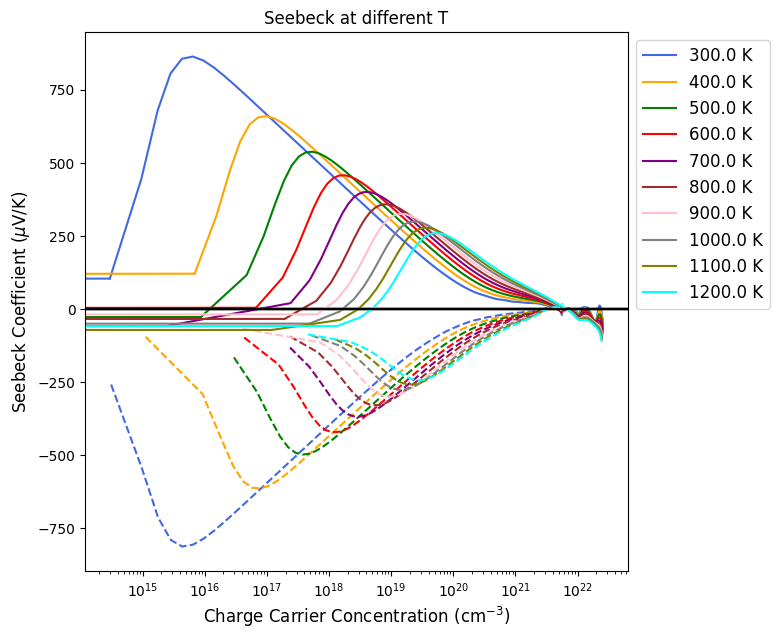

<Figure size 640x480 with 0 Axes>

In [5]:
plot_seebeck = CCplt.plot_cry_seebeck_carrier(seebeck,'s_xx','all')

In [ ]:
plot_seebeck.savefig('seebeck_potential',dpi=300)

Plot seebeck versus the charge carrier concentration

To differentiate transport coefficients due to n-type or p-type conduction (electrons or holes as majority carriers) dashed and solid lines are used, respectively.


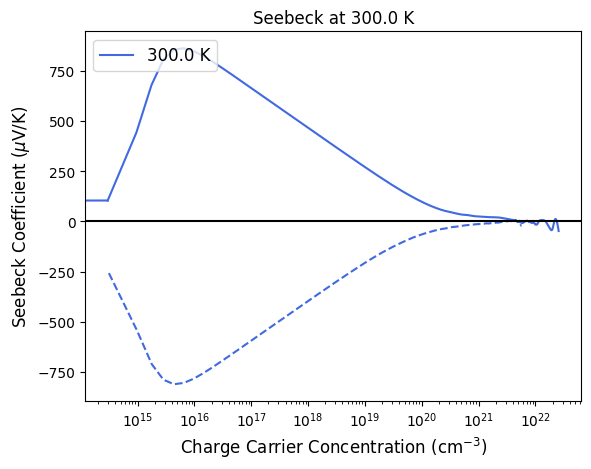

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
CCplt.plot_cry_seebeck_carrier(seebeck,'s_xx',300)

Now we will create two sigma objects, sigma and sigma1, reading two SIGMA.DAT files.

In [11]:
sigma = Properties_output().read_cry_sigma('transport_zrnisn_SIGMA.DAT')

In [12]:
sigma1 = Properties_output().read_cry_sigma('transport_zrnisn_antisito_SIGMA.DAT')

We can plot the electrical conductivity as a function of the chemical potential or of the charge carrier concentration, using the plot_cry_sigma_potential or plot_cry_sigma_carrier functions.

To differentiate transport coefficients due to n-type or p-type conduction (electrons or holes as majority carriers) dashed and solid lines are used, respectively.


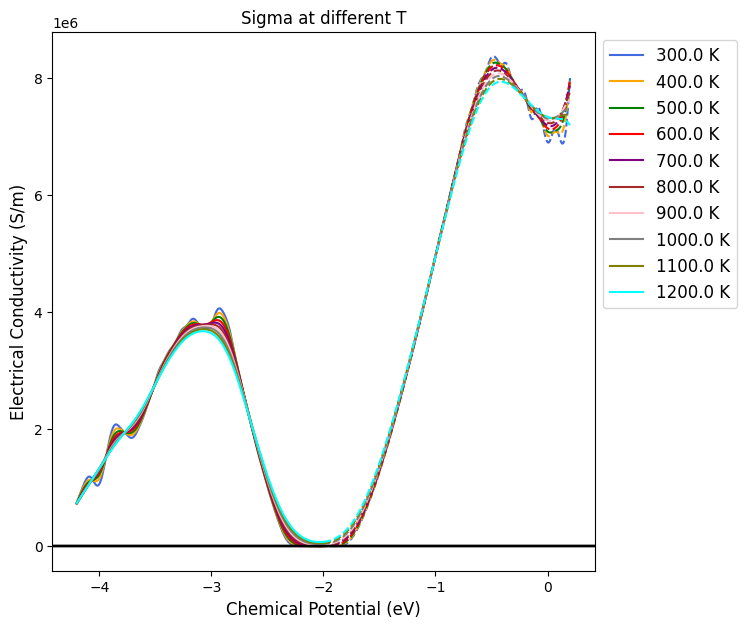

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [13]:
CCplt.plot_cry_sigma_potential(sigma,'s_xx','all')

If we want to compare on the same plot Seebeck coefficients or electrical conductivities coming from different file, we can use the plot_cry_multiseebeck and plot_cry_multisigma functions.

In [14]:
?CCplt.plot_cry_multiseebeck

Signature:
CCplt.plot_cry_multiseebeck(
    direction,
    temperature,
    minpot,
    maxpot,
    *seebeck,
)
Docstring:
Plot the seebeck coefficient from different files.

Args:
    direction (str): choose the direction to plot among 'S_xx', 'S_xy', 'S_xz', 'S_yx', 'S_yy', 'S_yz', 'S_yz', 'S_zx', 'S_zy', 'S_zz'.
    temperature (value): choose the temperature to be considered 
    minpot (value): lower value of chemical potential you want to plot in eV  
    maxpot (value): higher value of chemical potential you want to plot in eV 
    *seebeck (obj): Variable number of seebeck objects containing the data for the Seebeck coefficient.

Returns:
    Figure object

Notes:

    - Plots the seebeck coefficient for each seebeck object.
    - Differentiates transport coefficients due to n-type or p-type conduction using dashed and solid lines.
File:      c:\users\ascri\onedrive\desktop\dottorato_secondo_anno\tutorial_2022\electron_transport_properties\plot.py
Type:      function

To differentiate transport coefficients due to n-type or p-type conduction (electrons or holes as majority carriers) dashed and solid lines are used, respectively.


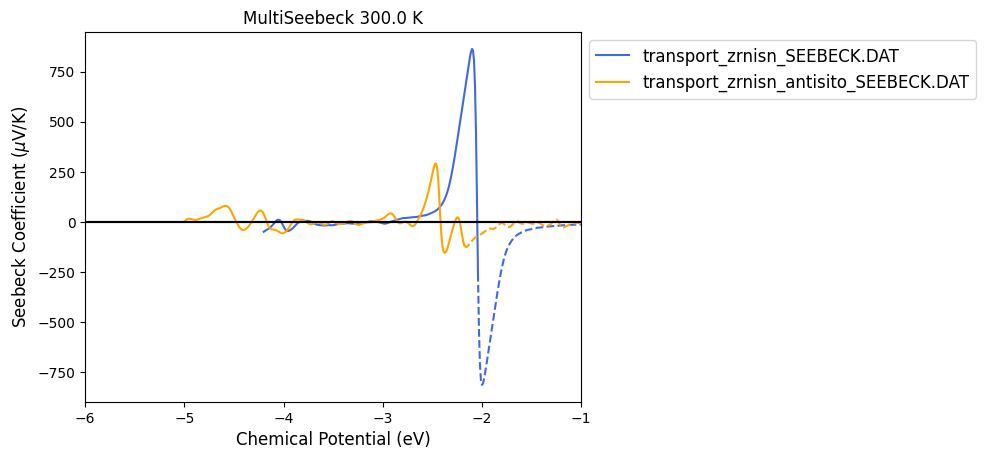

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [17]:
CCplt.plot_cry_multiseebeck('s_xx',300,-6,-1,seebeck, seebeck1,)

Plot multisigma

To differentiate transport coefficients due to n-type or p-type conduction (electrons or holes as majority carriers) dashed and solid lines are used, respectively.


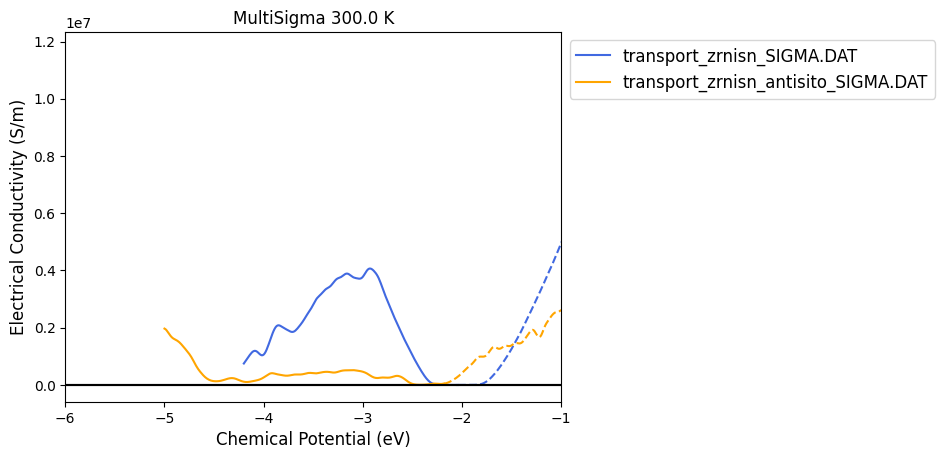

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [17]:
CCplt.plot_cry_multisigma('s_xx',300,-6,-1,sigma, sigma1)

To compute and plot the Power Factor and ZT we can use the plot_cry_powerfactor and plot_cry_zt functions.

To differentiate transport coefficients due to n-type or p-type conduction (electrons or holes as majority carriers) dashed and solid lines are used, respectively.


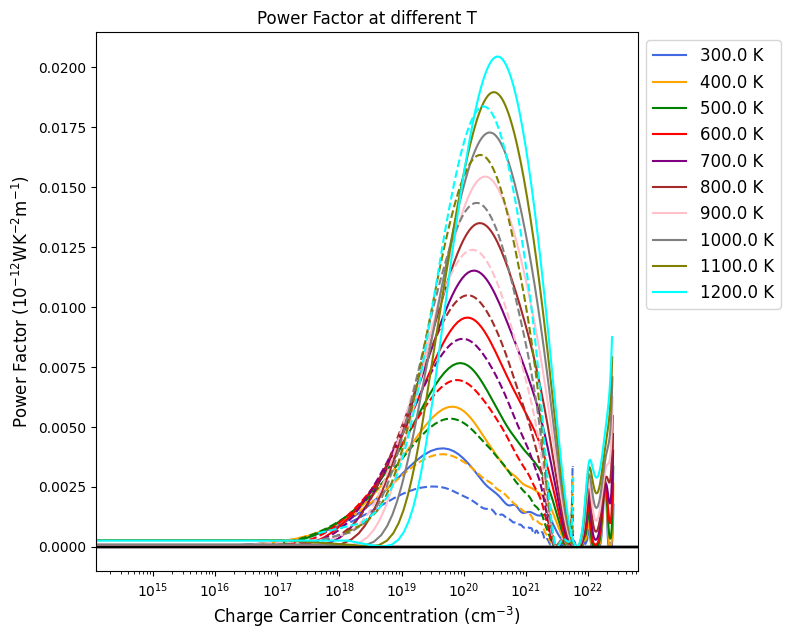

<function matplotlib.pyplot.gcf() -> 'Figure'>

In [18]:
CCplt.plot_cry_powerfactor_carrier(seebeck, sigma,'pf_xx','all')

In [21]:
?CCplt.plot_cry_zt

Signature: CCplt.plot_cry_zt(seebeck_obj, sigma_obj, direction, temperature, ktot)
Docstring:
Plot the ZT value for different temperatures.

Args:
    seebeck_obj (obj): Seebeck object containing the data for the Seebeck coefficient.
    sigma_obj (obj): Sigma object containing the data for the electrical conductivity.
    direction (str): choose the direction to plot among 'ZT_xx', 'ZT_xy', 'ZT_xz', 'ZT_yx', 'ZT_yy', 'ZT_yz', 'ZT_yz', 'ZT_zx', 'ZT_zy', 'ZT_zz'.
    temperature (value/str): choose the temperature to be considered or 'all' to consider them all together
    ktot (value): alue of the total thermal conductivity (ktot) in W-1K-1m-1

Returns:
    Figure object

Notes:
    - Calculates the ZT value using the Seebeck coefficient and electrical conductivity data.
    - Plots the ZT value for each temperature as a function of the chemical potential.
File:      c:\users\ascri\onedrive\desktop\dottorato_secondo_anno\tutorial_2022\electron_transport_properties\plot.py
Type:      fu

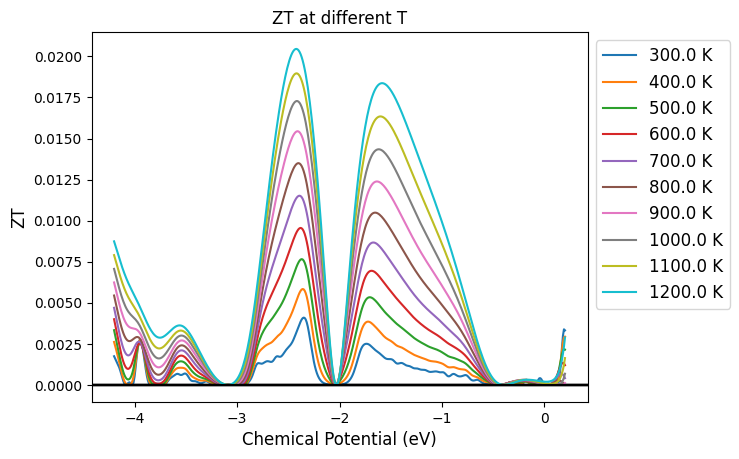

<function matplotlib.pyplot.gcf() -> 'Figure'>

In [20]:
CCplt.plot_cry_zt(seebeck,sigma,'zt_xx','all',10)